In [23]:
import axelrod as axl
import matplotlib.pyplot as plt
import seaborn as sn
import random
from numpy import mean
%matplotlib inline

In [3]:
def plot_match_lengths(p_end, reps):
    trnmt = axl.ProbEndTournament([s() for s in axl.basic_strategies], prob_end=p_end, keep_matches=True, repetitions=reps)
    _ = trnmt.play()

    plt.figure()
    lengths = [len(m) for rep in trnmt.matches for m in rep]
    plt.hist(lengths);
    plt.xlim(1, max(lengths))
    plt.title("$p={};$ reps$={}$" .format(p_end, reps));
    return plt

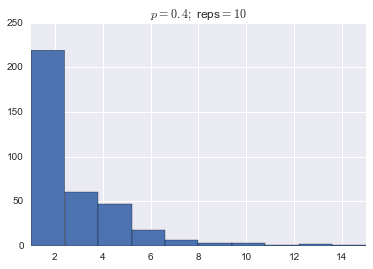

In [4]:
plot_match_lengths(0.4,  10);

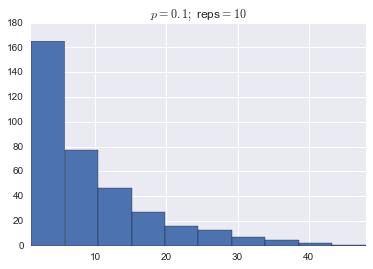

In [5]:
plot_match_lengths(.1,  10);

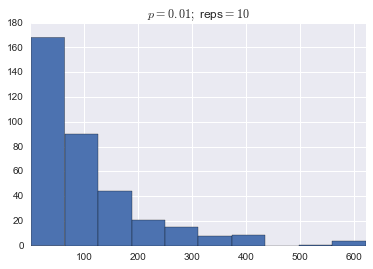

In [6]:
plot_match_lengths(.01,  10);

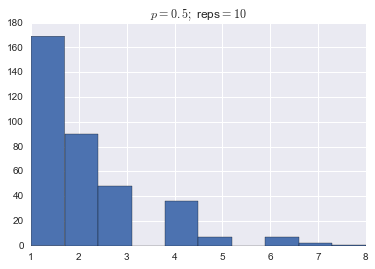

In [7]:
plot_match_lengths(.5,  10);

In [60]:
random.seed(3)
p_end, reps = .01, 2
players = [axl.Random(), axl.Cooperator(), axl.Alternator(), axl.Defector(), axl.Random()]
trnmt = axl.ProbEndTournament(players, prob_end=p_end, keep_matches=True, repetitions=reps)
results = trnmt.play()

In [61]:
trnmt.game.scores

{('C', 'C'): (3, 3),
 ('C', 'D'): (0, 5),
 ('D', 'C'): (5, 0),
 ('D', 'D'): (1, 1)}

In [62]:
trnmt.players

[Random: 0.5, Cooperator, Alternator, Defector, Random: 0.5]

In [63]:
lengths = [[len(m) for m in rep] for rep in trnmt.matches]
players = [(m.player1, m.player2) for rep in trnmt.matches for m in rep]
scores = [m.scores(trnmt.game) for rep in trnmt.matches for m in rep]

In [64]:
trnmt.matches

[[<axelrod.match.Match at 0x10c88eba8>,

In [65]:
scores_per_reps = [{j:0 for j, _ in enumerate(trnmt.players)} for rep in trnmt.matches]
for i, matches in enumerate(trnmt.matches):
    for match in matches:
        scores = match.scores()
        for j, p in enumerate(match.players):
            scores_per_reps[i][j] += mean([s[j] for s in scores])
            
print(scores_per_reps)

[{0: 29.770692947060617, 1: 37.398223322401002, 2: 0, 3: 0, 4: 0}, {0: 28.944251252078963, 1: 38.415344102071892, 2: 0, 3: 0, 4: 0}]


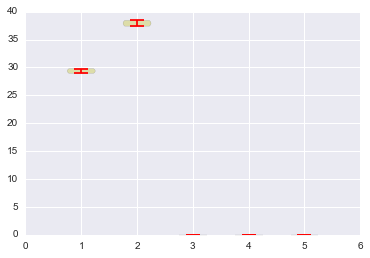

In [66]:
plt.violinplot([[rep[j] for rep in scores_per_reps] for j,_ in enumerate(trnmt.players)]);